# Perceptron pratical work

Lais Isabelle Alves Dos Santos

Louis Chanaron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from matplotlib.pyplot import Line2D
from sklearn.metrics import f1_score

#rd.seed(seed=0)

## Part I: Synthetic data

In [ ]:
sig2 = 0.2
#Distributions to generate gaussian variables lists:
D0 = lambda n, s2: rd.multivariate_normal([-1, 0], s2*np.eye(2), size=n)
D1 = lambda n, s2: rd.multivariate_normal([1, 0], s2*np.eye(2), size=n)
#An example of such lists:
X0 = D0(100, sig2)
X1 = D1(100, sig2)
w = np.array([0, 0, 1])

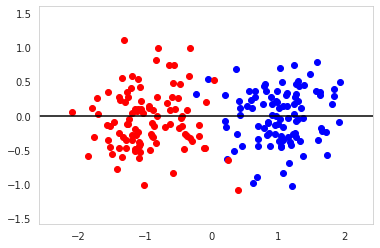

In [ ]:
def plot(X0, X1, w):
  """Plot data and the linear separation of normal w"""
  plt.scatter(X1[:, 0], X1[:, 1], c='b')
  plt.scatter(X0[:, 0], X0[:, 1], c='r')
  x_min = X0[:, 0].min() - 0.5
  x_max = X1[:, 0].max() + 0.5
  y_min = np.min([X0[:, 1].min(), X1[:, 1].min()]) - 0.5
  y_max = np.max([X0[:, 1].max(), X1[:, 1].max()]) + 0.5
  x = np.array([x_min, x_max])
  if w[2] != 0:
    y = -w[0]/w[2]-x*w[1]/w[2]
    plt.plot(x, y, c='k')
  else:
    plt.vlines(0, -2, 2)
  plt.xlim((x_min, x_max))
  plt.ylim((y_min, y_max))
  plt.show()
  return

plot(X0, X1, w)

### 1.

In [ ]:
def fit(X0, X1, N, eta, w=None):
  """Perceptron trying to fit data, returns vector w,
  N is the number of samples, eta the learning rate and w the starting model
  if len(X0)+len(X1) < N, it reuses many times some samples"""

  if w==None:
    w = np.array([0, 0, 1])
  
  d0 = -np.ones(len(X0))
  d1 = np.ones(len(X1))

  X = np.concatenate((X0, X1))
  d = np.concatenate((d0, d1))[:, np.newaxis]
  X = np.concatenate((X, d), axis=1)
  rd.shuffle(X)
  Nx = len(X)

  for k in range(1, N):
    u = Nx%k-1
    x, label = X[u][:2], X[u][2]
    
    w = train(x, w, eta, label)

  return w

def train(x, w, eta, label):
  """Perceptron training on sample, return new w"""
  vec3 = np.ones(3)
  vec3[1:] = x
  
  pred_x = predict(x, w)
  if (pred_x >= 0 and label<0) or (pred_x<0 and label>=0):
    w = w + label*eta*vec3
  return w

def predict(x, w=w):
  """"Prediction of label, return label"""
  vec3 = np.ones(3)
  vec3[1:] = x
  return np.sign(vec3@w)

[0.         1.89846227 0.88811663]


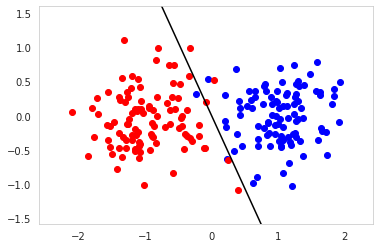

In [ ]:
w = fit(X0, X1, 100, 1)
print(w)
plot(X0, X1, w)

We will consider the number of operations in each iteration as an indicator of the computational complexity:

Let $m\in\mathbb{N}$ be the sample pool size,

then, for each sample the perceptron performs a scalar product (for prediction), and various vector sums and multiplications of vecteurs by real numbers. Then the complexity of the training algorithm is $O(m*d)$ where $d$ is the VC-dimension of halfspaces.

Furthermore, if consider we work with APAC learning model (as far as the data may not be separable and $\eta$ is fixed). We may assume the perceptron performs an empirical risk minimization and  ensures the uniform convergence property.  It is reasonable if the standard deviation of our normal distributions is not too big and the clusters are not too mixed.
This allows us to take: 

$m \sim \frac{2d+log(\frac{1}{\delta})}{\epsilon^2}\forall\epsilon > 0, \forall\delta > 0$, 

It corresponds to a polynomial computational complexity of $O(d\frac{2d+log(\frac{1}{\delta})}{\epsilon^2})$.


### 2.

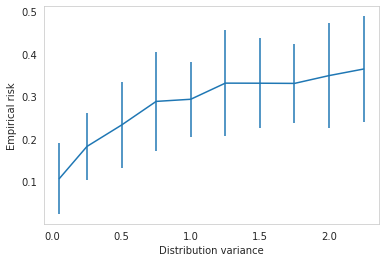

In [ ]:
sig_list = [0.05, 0.25, 0.50, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]
n = len(sig_list)
N_training = 20
N_average = 100

err = np.zeros((n, N_average))
for k in range(n):
  for l in range(N_average):
      sig2 = sig_list[k]
      w = fit(D0(N_training//2, sig2), D1(N_training//2, sig2), N_training, 0.1)
      err[k, l] = 1-f1_score(100*[-1]+100*[1], [predict(x, w) for x in np.concatenate((D0(100, sig2), D1(100, sig2)))])

plt.errorbar(sig_list, np.mean(err, axis=1), yerr = np.std(err, axis=1))
plt.xlabel("Distribution variance")
plt.ylabel("Empirical risk")
plt.show()

The above graph is consistent with the fact that perceptron is less efficient to deal with non linearly separable datasets. In addition, the risk increases in a logarithmic way of the standard deviation of both clusters.

### 3.

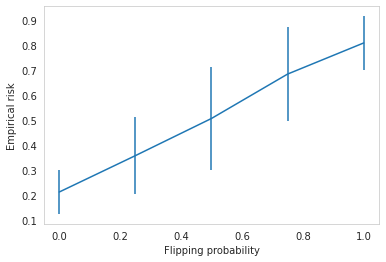

In [ ]:
flip_list = [0., 0.25, 0.50, 0.75, 1]

n = len(flip_list)
N_training = 20
N_average = 100
sig2 = 0.25

err = np.zeros((n, N_average))
for k in range(n):
  for l in range(N_average):
      flip = flip_list[k:k+1]
      X0 = D0(N_training//2, sig2)
      X1 = D1(N_training//2, sig2)
      noisy_X0 = []
      noisy_X1 = []

      for x in X0:
        if (not rd.binomial(1, flip)[0]):
          noisy_X0+=[x]
        else:
          noisy_X1+=[x]
      
      for x in X1:
        if (not rd.binomial(1, flip)[0]):
          noisy_X1+=[x]
        else:
          noisy_X0+=[x]

      w = fit(noisy_X0, noisy_X1, N_training, 0.1)
      err[k, l] = 1-f1_score(100*[-1]+100*[1], [predict(x, w) for x in np.concatenate((D0(100, sig2), D1(100, sig2)))])

plt.errorbar(flip_list, np.mean(err, axis=1), yerr = np.std(err, axis=1))
plt.xlabel("Flipping probability")
plt.ylabel("Empirical risk")
plt.show()

This is also consistent: the empirical risk goes from a very small value if the mislabelling probability of the training set is zero and it is very high if all the labels have been exchange. Furthermore, there is a linear relationship between those parameters.

## Part II: Dealing with real data

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

iris = sns.load_dataset('iris')
trainSet, testSet = train_test_split(iris, train_size=0.8)

### 2.1 Application to binary classification

#### 1.

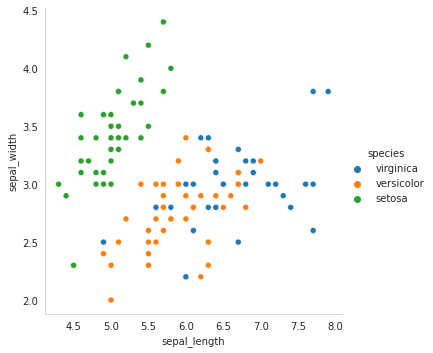

In [ ]:
sns.set_style('whitegrid', {'axes.grid' : False})
sns.relplot(data=trainSet, x='sepal_length', y='sepal_width', hue='species')
plt.show()

#### 2.

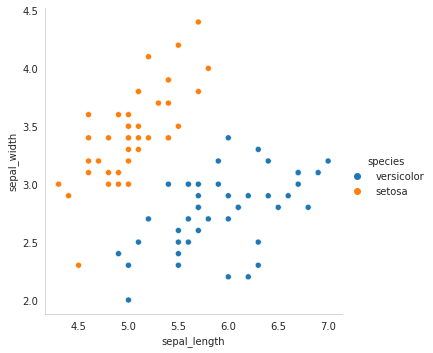

[ -2.    6.5 -10.1]


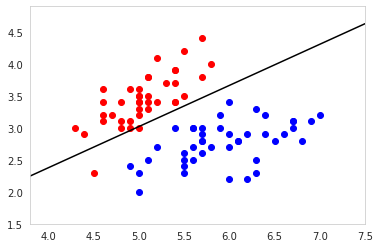

In [ ]:
train2 = trainSet[trainSet["species"] != "virginica"]
sns.set_style('whitegrid', {'axes.grid' : False})
sns.relplot(data=train2, x='sepal_length', y='sepal_width', hue='species')
plt.show()

train_set = train2[train2["species"] == "setosa"].to_numpy()
train_ver = train2[train2["species"] == "versicolor"].to_numpy()

XX0 = np.array([train_set[:,0], train_set[:,1]])
XX1 = np.array([train_ver[:,0], train_ver[:,1]])

XX0 = np.array([[XX0[0][index], XX0[1][index]] for index in range(XX0.shape[1])])
XX1 = np.array([[XX1[0][index], XX1[1][index]] for index in range(XX1.shape[1])])

length_X0 = XX0.shape[0]
length_X1 = XX1.shape[0]

if (length_X0 < length_X1):
  diff = length_X1 - length_X0
  for i in range(diff):
    XX1 = np.delete(XX1, obj=0, axis=0)
elif (length_X1 < length_X0):
  diff = length_X0 - length_X1
  for i in range(diff):
    XX0 = np.delete(XX0, obj=0, axis=0)

w = fit(XX0, XX1, XX0.shape[0] + XX1.shape[0], 1)
print(w)
plot(train_set, train_ver, w)

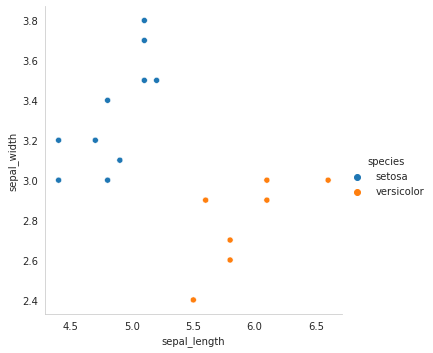

[ -2.    6.5 -10.1]


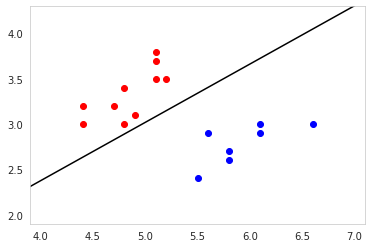

In [ ]:
test2 = testSet[testSet["species"] != "virginica"]
sns.set_style('whitegrid', {'axes.grid' : False})
sns.relplot(data=test2, x='sepal_length', y='sepal_width', hue='species')
plt.show()

test_set = test2[test2["species"] == "setosa"].to_numpy()
test_ver = test2[test2["species"] == "versicolor"].to_numpy()

print(w)
plot(test_set, test_ver, w)

Considering a real dataset, like Iris Dataset, it is possible to train the neural network Perceptron and obtain as result a good, but not perfect, separation of two distinct classes. \\
In the train dataset, it was possible to achieve a hiperplane that separates the classes, but there is still some data that is over the other side of the hiperplane. \\
Some of the difficults to train the neural network Perceptron with the Iris dataset was separating the two classes by having the same size of data. Thereby, if one class is greater than the other, that one ends losing some data to do the calculation. \\
Finally, the test set was considerably good separated by the Perceptron hiperplane. 